In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/parkinsons-disease/updated_dataset.csv
/kaggle/input/parkinsons-disease/dataset.csv


## Dataset Overview
Voice analysis dataset for Parkinson's disease detection using acoustic features.

## Key Variables

### Target Variable
- **status**: Diagnosis indicator (1 = Parkinson's disease, 0 = Healthy control)

### Primary Voice Features

#### Fundamental Frequency (Pitch)
- **MDVP:Fo(Hz)**: Average fundamental frequency in Hertz
- **MDVP:Fhi(Hz)**: Maximum fundamental frequency in Hertz
- **MDVP:Flo(Hz)**: Minimum fundamental frequency in Hertz

#### Pitch Variation (Jitter Measures)
- **MDVP:Jitter(%)**: Percentage measure of pitch instability
- **MDVP:Jitter(Abs)**: Absolute measure of pitch instability
- **MDVP:RAP**: Relative average perturbation
- **MDVP:PPQ**: Pitch period perturbation quotient
- **Jitter:DDP**: Average of pitch differences between cycles

#### Amplitude Variation (Shimmer Measures)
- **MDVP:Shimmer**: Measure of amplitude variation in voice
- **MDVP:Shimmer(dB)**: Amplitude variation in decibels
- **Shimmer:APQ3**: Average amplitude perturbation over 3 periods
- **Shimmer:APQ5**: Average amplitude perturbation over 5 periods
- **MDVP:APQ**: Amplitude perturbation quotient across sample
- **Shimmer:DDA**: Average absolute difference between amplitudes

#### Voice Quality Metrics
- **NHR**: Noise-to-harmonics ratio (measures breathiness/noise)
- **HNR**: Harmonics-to-noise ratio (reflects voice clarity)

#### Signal Complexity Features
- **RPDE**: Recurrence period density entropy (signal complexity)
- **DFA**: Detrended fluctuation analysis (signal self-similarity)
- **spread1**: Spectral spread measure (voice quality)
- **spread2**: Additional spectral spread measure
- **D2**: Fractal dimension of signal structure
- **PPE**: Pitch period entropy (pitch variation complexity)

In [2]:
df1 = pd.read_csv("/kaggle/input/parkinsons-disease/dataset.csv")

In [3]:
df1.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1.0,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1.0,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1.0,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1.0,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1.0,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [4]:
# Basic information about our dataset

print("=== BASIC DATASET INFORMATION ===")

print(f"Dataset shape: {df1.shape}")

print(f"\n===== Column names =====\n{df1.columns.tolist()}")

print(f"\n====== Data types =====\n{df1.dtypes} ")

print(f"\n===== Missing values =====\n{df1.isnull().sum()}")

print(f"\n===== Missing percentage =====\n{(df1.isnull().sum()/len(df1))*100}")

print(f"\n===== Duplicate rows =====\n{df1.duplicated().sum()}")

print(f"\n===== Data Statistics =====\n{df1.describe().T}")



=== BASIC DATASET INFORMATION ===
Dataset shape: (1195, 24)

===== Column names =====
['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)', 'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP', 'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5', 'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA', 'spread1', 'spread2', 'D2', 'PPE']

====== Data types =====
name                 object
MDVP:Fo(Hz)         float64
MDVP:Fhi(Hz)        float64
MDVP:Flo(Hz)        float64
MDVP:Jitter(%)      float64
MDVP:Jitter(Abs)    float64
MDVP:RAP            float64
MDVP:PPQ            float64
Jitter:DDP          float64
MDVP:Shimmer        float64
MDVP:Shimmer(dB)    float64
Shimmer:APQ3        float64
Shimmer:APQ5        float64
MDVP:APQ            float64
Shimmer:DDA         float64
NHR                 float64
HNR                 float64
status              float64
RPDE                float64
DFA                 float64
spread1             float64


In [5]:
df2 = df1.copy()
df2.drop('name',axis=1,inplace=True)

In [6]:
df2['status'] = df2['status'].astype(int)

In [7]:
df2.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


# Distribution of target Variable

In [8]:
df2['status'].value_counts(normalize=True) * 100

status
0    87.698745
1    12.301255
Name: proportion, dtype: float64

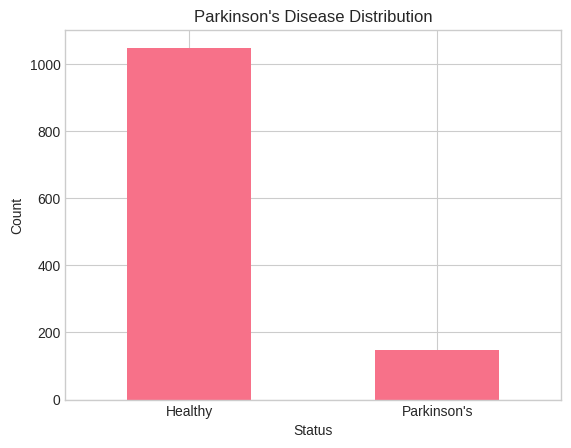

In [9]:
df2['status'].value_counts().plot(kind='bar')
plt.title('Parkinson\'s Disease Distribution')
plt.xlabel('Status')
plt.ylabel('Count')
plt.xticks([0,1], ['Healthy', 'Parkinson\'s'], rotation=0)
plt.show()

> The dataset is highly imbalanced. Almost all samples are Parkinson’s patients, and only a few are healthy.

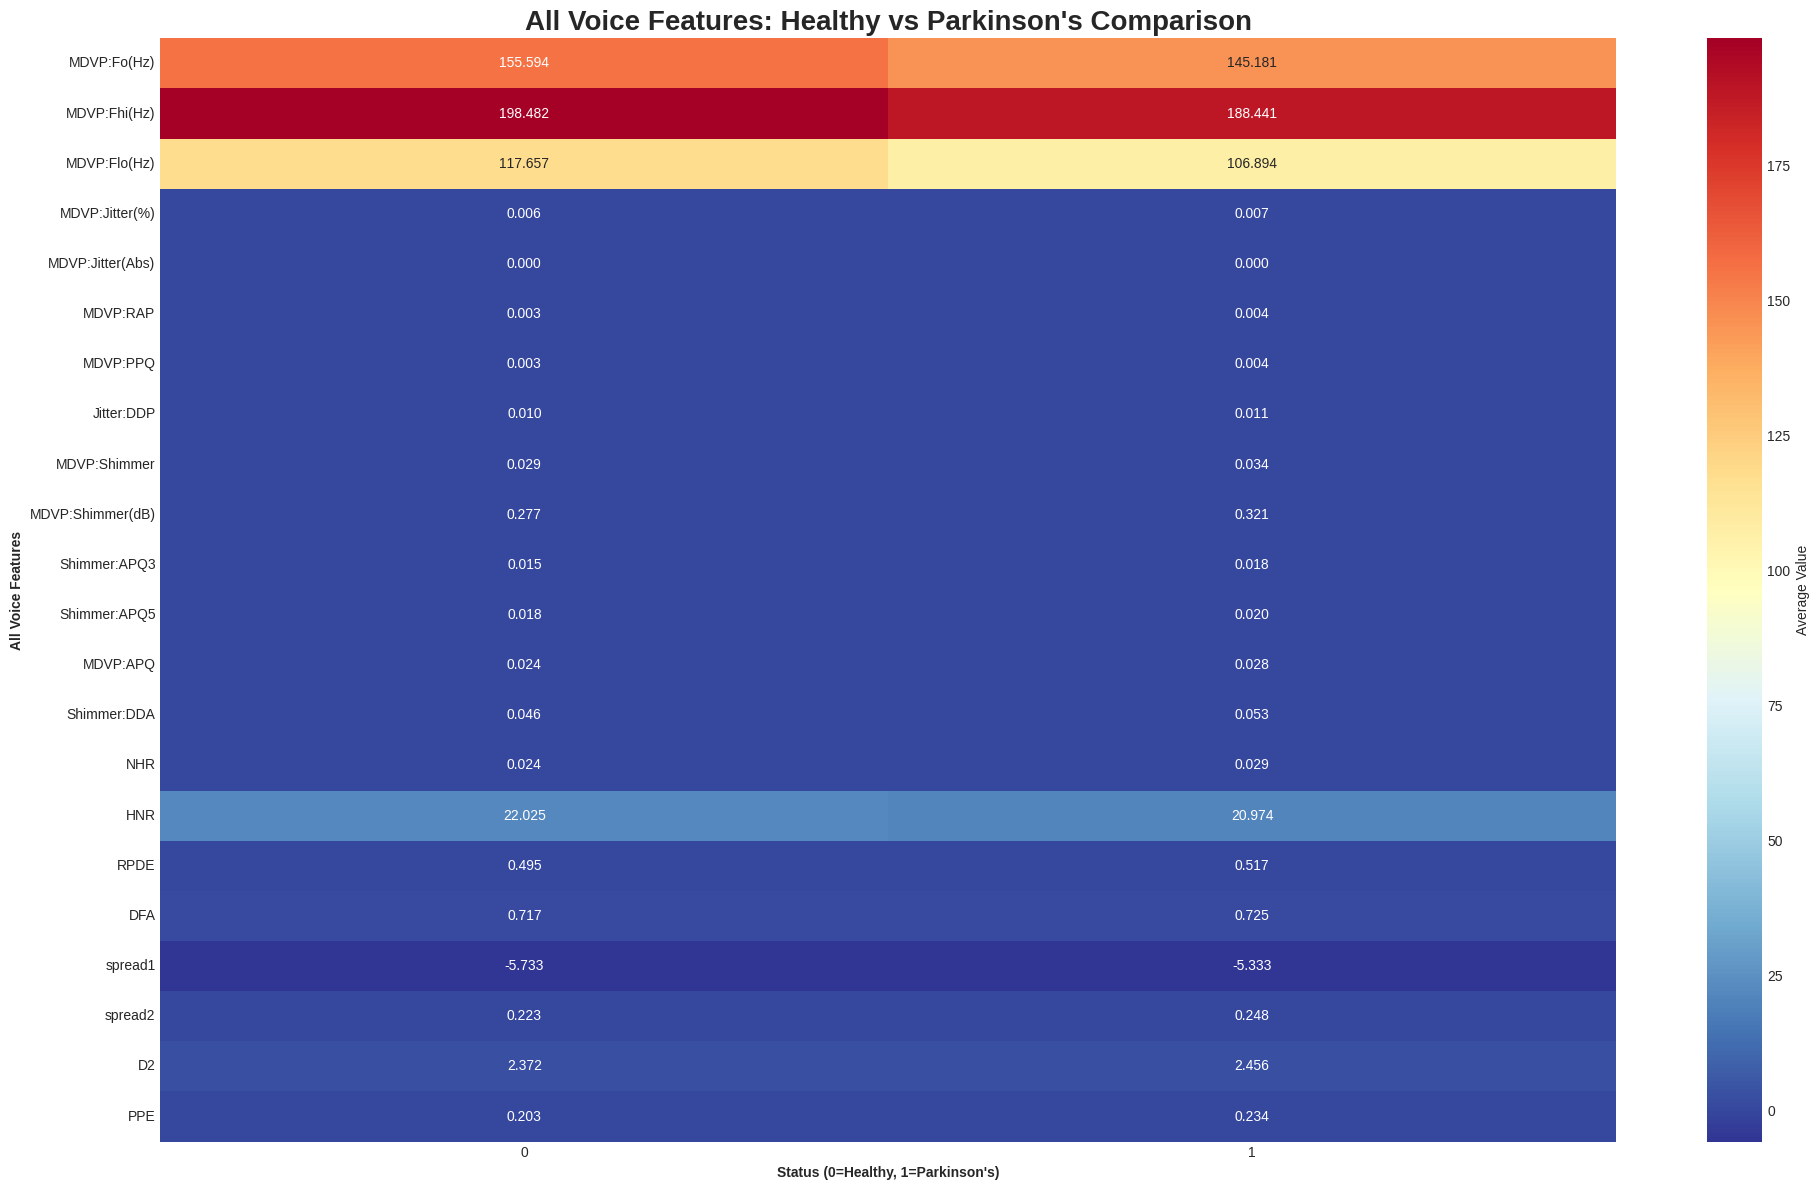

In [10]:
grouped_means = df2.groupby('status').mean()

plt.figure(figsize=(20, 12))  
sns.heatmap(grouped_means.T, annot=True, fmt='.3f', cmap='RdYlBu_r', 
            cbar_kws={'label': 'Average Value'})
plt.title('All Voice Features: Healthy vs Parkinson\'s Comparison', 
          fontweight='bold', fontsize=20)
plt.xlabel('Status (0=Healthy, 1=Parkinson\'s)', fontweight='bold')
plt.ylabel('All Voice Features', fontweight='bold')
plt.tight_layout()
plt.show()

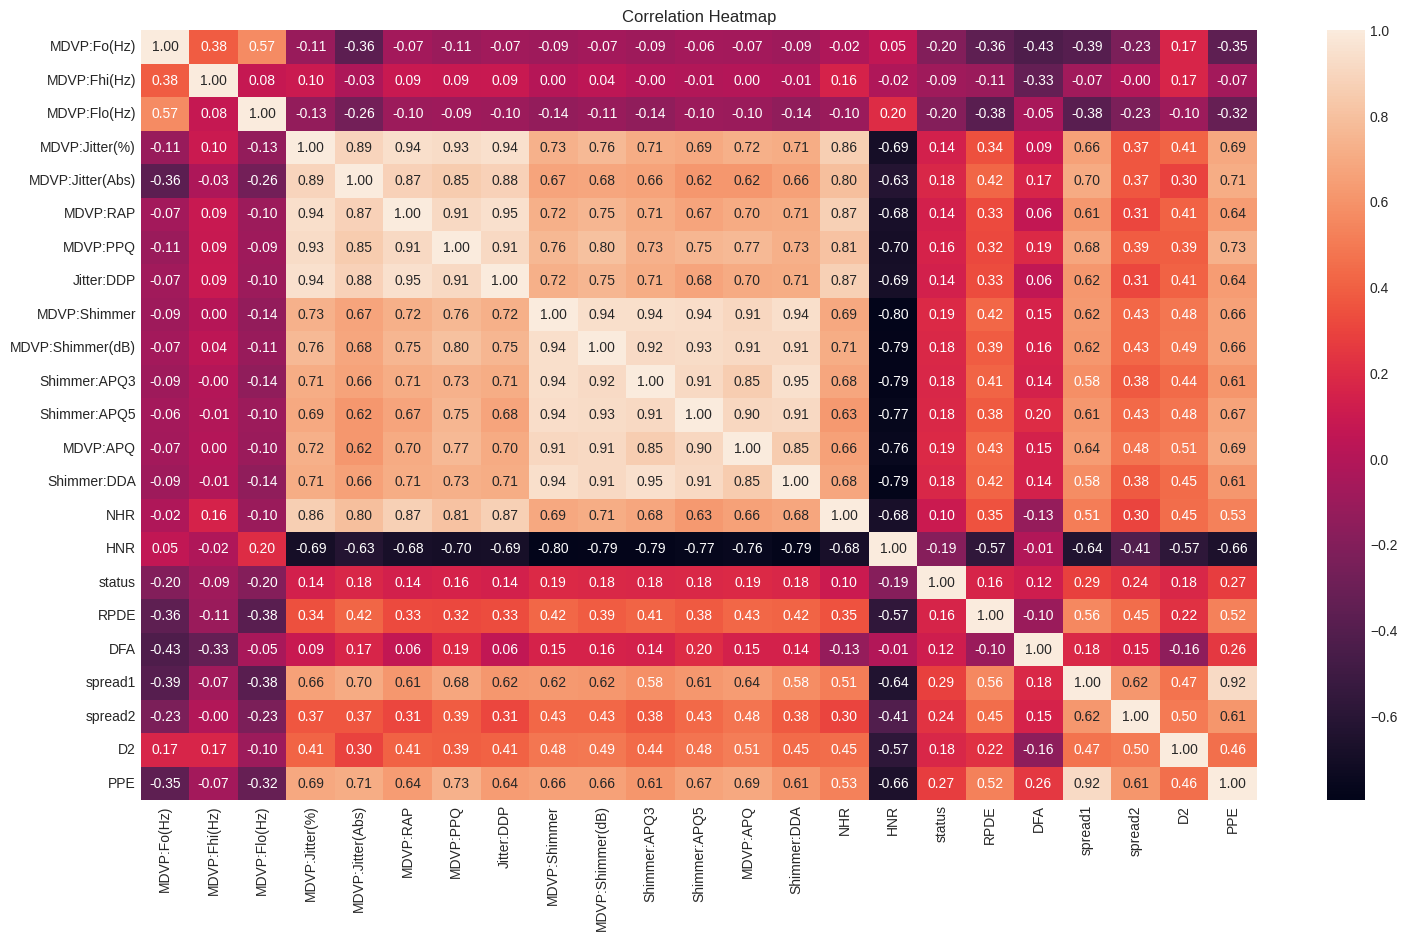

In [11]:
corr_matrix = df2.corr()

plt.figure(figsize=(18,10))
sns.heatmap(corr_matrix,annot=True,fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [12]:
# Keep only upper triangle (to avoid duplicate pairs)
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

threshold = 0.9
to_drop = set()

for col in upper.columns:
    for row in upper.index:
        if abs(upper.loc[row, col]) > threshold:
            # compare correlation with target
            corr_col = abs(corr_matrix[col]['status'])
            corr_row = abs(corr_matrix[row]['status'])

            # drop the one with lower correlation with status
            if corr_col > corr_row:
                to_drop.add(row)
            else:
                to_drop.add(col)

In [13]:
to_drop

{'Jitter:DDP',
 'MDVP:APQ',
 'MDVP:Jitter(%)',
 'MDVP:RAP',
 'MDVP:Shimmer(dB)',
 'PPE',
 'Shimmer:APQ3',
 'Shimmer:APQ5',
 'Shimmer:DDA'}

In [14]:
df3 = df2.drop(columns=to_drop,axis=1)

In [15]:
df3.shape

(1195, 14)

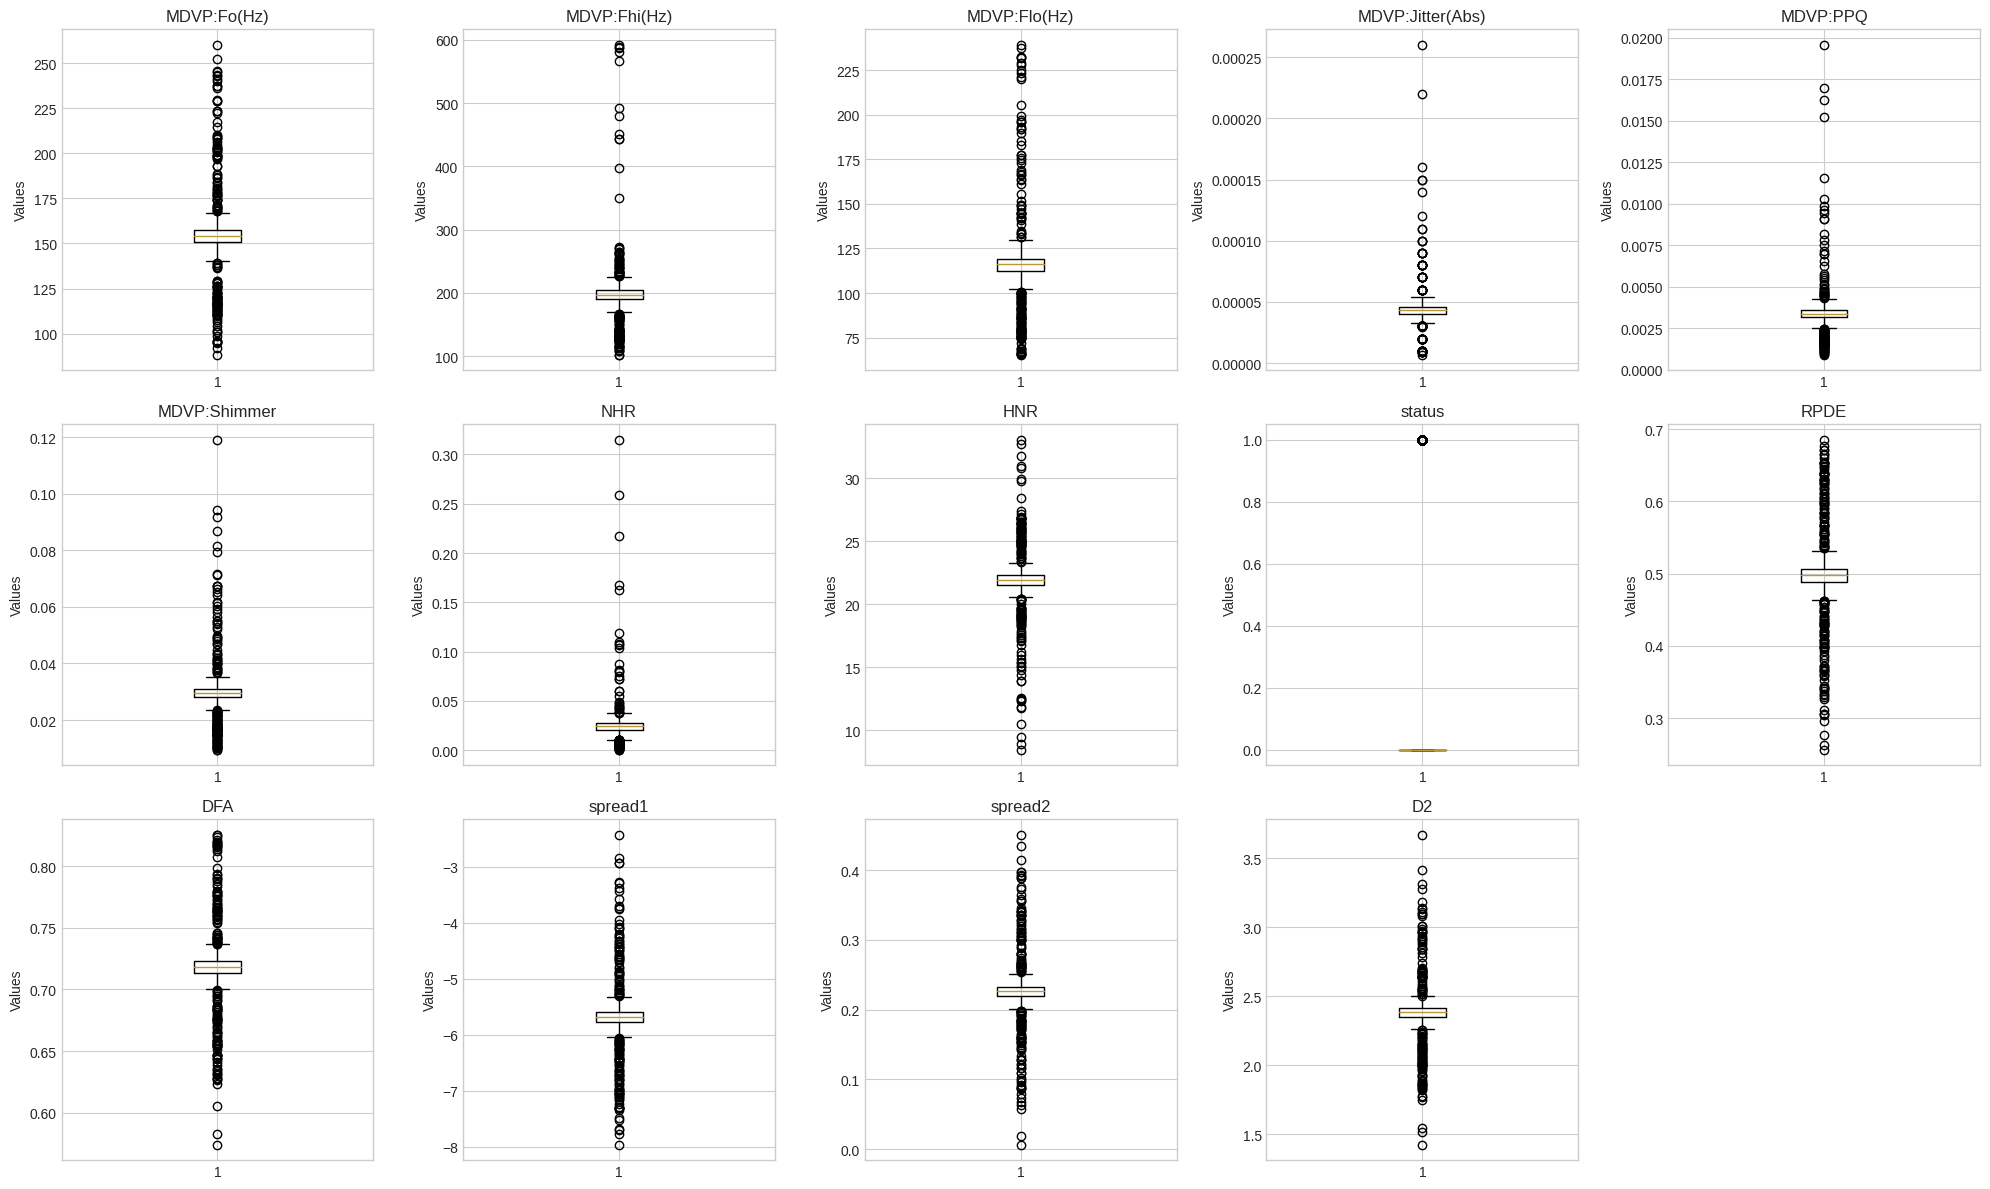

In [16]:
columns = df3.columns.tolist()  
n_cols = 5
n_rows = (len(columns) + n_cols - 1) // n_cols

plt.figure(figsize=(20, 4*n_rows))
for i, column in enumerate(columns):
    plt.subplot(n_rows, n_cols, i+1)
    plt.boxplot(df3[column])
    plt.title(column)
    plt.ylabel('Values')

plt.tight_layout()
plt.show()

In [17]:
df3['status'].value_counts()

status
0    1048
1     147
Name: count, dtype: int64

In [18]:
# Remove outliers from each class separately
def remove_outliers(df, exclude_cols=['status']):
    df_clean = df.copy()
    
    # Separate classes
    class_0 = df_clean[df_clean['status'] == 0].copy()
    class_1 = df_clean[df_clean['status'] == 1].copy()
    def class_outliers_removal(class_df,min_samples=10):
        if len(class_df) < min_samples:  # FIXED: Added missing parenthesis
            return class_df
            
        numeric_cols = class_df.drop(columns=exclude_cols).columns
        outlier_mask = pd.Series([True]*len(class_df), index = class_df.index)
    
        for col in numeric_cols:
            Q1 = class_df[col].quantile(0.25)
            Q3 = class_df[col].quantile(0.75)
            IQR = Q3 - Q1
            # use more relaxed bounds
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            mask = ((class_df[col] >= lower_bound) & (class_df[col] <= upper_bound))
            outlier_mask = outlier_mask & mask
        class_clean_df = class_df[outlier_mask]
        return class_df if len(class_clean_df) < len(class_df)*0.7 else class_clean_df
        
    class_0_clean = class_outliers_removal(class_0,min_samples=5)
    class_1_clean = class_outliers_removal(class_1,min_samples=50)
    df_clean = pd.concat([class_0_clean, class_1_clean], ignore_index=True)
    return df_clean

In [19]:
df4 = remove_outliers(df3)

In [20]:
df4.shape

(1070, 14)

In [21]:
print("After class-wise outlier removal:")
print(df4['status'].value_counts())

After class-wise outlier removal:
status
0    949
1    121
Name: count, dtype: int64


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

In [23]:
X = df4.drop(columns=['status'])
y = df4['status']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

In [25]:
print("X_train shape:", X_train.shape)
print("X_test shape :", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape :", y_test.shape)

X_train shape: (749, 13)
X_test shape : (321, 13)
y_train shape: (749,)
y_test shape : (321,)


In [26]:
print("y_train: ", y_train.value_counts())
print("y_test: ", y_test.value_counts())

y_train:  status
0    664
1     85
Name: count, dtype: int64
y_test:  status
0    285
1     36
Name: count, dtype: int64


In [27]:
from sklearn.utils import resample

train_df = pd.concat([X_train, y_train], axis=1)

majority = train_df[train_df['status'] == 1]
minority = train_df[train_df['status'] == 0]

# Upsample minority only in training set
minority_upsampled = resample(
    minority,
    replace=True,
    n_samples=len(majority),
    random_state=42
)

train_balanced = pd.concat([majority, minority_upsampled])
X_train_upsampled = train_balanced.drop(columns=['status'])
y_train_upsampled = train_balanced['status']

In [28]:
y_train_upsampled.value_counts()

status
1    85
0    85
Name: count, dtype: int64

In [29]:
# from imblearn.over_sampling import SMOTE
# smote = SMOTE(random_state=42)

In [30]:
# X_train_upsampled , y_train_upsampled = smote.fit_resample(X_train,y_train)

In [31]:
scaler = StandardScaler()
X_train_transformed = scaler.fit_transform(X_train_upsampled)
X_test_transformed = scaler.transform(X_test)  

In [32]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, f1_score, precision_score, recall_score
from sklearn.model_selection import cross_val_score, StratifiedKFold

In [33]:
models = {
        "RandomForest": RandomForestClassifier(
            n_estimators=100, max_depth=8, min_samples_split=10, 
            min_samples_leaf=4, random_state=42
        ),
        "DecisionTree": DecisionTreeClassifier(
            max_depth=6, min_samples_split=10, 
            min_samples_leaf=5, random_state=42
        ),
        "XGBoost": XGBClassifier(
            n_estimators=100, learning_rate=0.05, max_depth=3, 
            subsample=0.8, colsample_bytree=0.8, random_state=42
        ),
        "SVM": SVC(
            C=0.1, kernel='rbf', gamma='scale', 
            probability=True, random_state=42
        ),
        'GradientBoosting': GradientBoostingClassifier(
            n_estimators=100, learning_rate=0.05, max_depth=3, 
            subsample=0.8, random_state=42
        ),
    }

In [34]:
results = []
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for name, model in models.items():
    
    # cross-validation on training data
    cv_scores = cross_val_score(model,X_train_transformed,y_train_upsampled,cv=cv,scoring='f1_weighted')
    
    model.fit(X_train_transformed, y_train_upsampled)

    # Predictions
    y_pred_train = model.predict(X_train_transformed)
    y_pred_test = model.predict(X_test_transformed)

    accuracy_train = accuracy_score(y_train_upsampled, y_pred_train)
    accuracy_test =  accuracy_score(y_test, y_pred_test)
    precision = precision_score(y_test, y_pred_test, average='weighted')
    recall = recall_score(y_test, y_pred_test, average='weighted')
    f1 = f1_score(y_test, y_pred_test, average='weighted')
    roc_auc = None
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test_transformed)[:,1]
        roc_auc = roc_auc_score(y_test, y_proba)

    results.append({
        'Model': name,
        'CV_Mean_F1': cv_scores.mean(),
        'CV_Std_F1': cv_scores.std(),
        'Train_Accuracy': accuracy_train,
        'Test_Accuracy': accuracy_test,
        'Test_Precision': precision,
        'Test_Recall': recall,
        'Test_F1': f1,
        'ROC_AUC': roc_auc,
        'Confusion_Matrix': confusion_matrix(y_test, y_pred_test).tolist()
        
    })


results_df = pd.DataFrame(results)


In [35]:
f1_score(y_test, y_pred_test, average=None, labels=[0,1])

array([0.99824253, 0.98630137])

In [36]:
results_df.round(4)

,Model,CV_Mean_F1,CV_Std_F1,Train_Accuracy,Test_Accuracy,Test_Precision,Test_Recall,Test_F1,ROC_AUC,Confusion_Matrix
0,RandomForest,1.0000,0.0000,1.0000,0.9969,0.997,0.9969,0.9969,1.0000,"[[284, 1], [0, 36]]"
1,DecisionTree,0.9410,0.0373,0.9882,0.9969,0.997,0.9969,0.9969,0.9982,"[[284, 1], [0, 36]]"
2,XGBoost,1.0000,0.0000,1.0000,1.0000,1.000,1.0000,1.0000,1.0000,"[[285, 0], [0, 36]]"
3,SVM,1.0000,0.0000,1.0000,1.0000,1.000,1.0000,1.0000,1.0000,"[[285, 0], [0, 36]]"
4,GradientBoosting,0.9882,0.0144,1.0000,0.9969,0.997,0.9969,0.9969,1.0000,"[[284, 1], [0, 36]]"


In [37]:
idx = results_df['Test_F1'].idxmax()
name = results_df.iloc[idx]['Model']
best_model = models[name]

In [38]:
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': best_model.feature_importances_
}).sort_values('importance', ascending=False)

In [39]:
feature_importance

,feature,importance
2,MDVP:Flo(Hz),0.198358
3,MDVP:Jitter(Abs),0.160752
6,NHR,0.125597
8,RPDE,0.108177
1,MDVP:Fhi(Hz),0.072259
0,MDVP:Fo(Hz),0.064368
4,MDVP:PPQ,0.060429
5,MDVP:Shimmer,0.043627
7,HNR,0.041516
10,spread1,0.034224


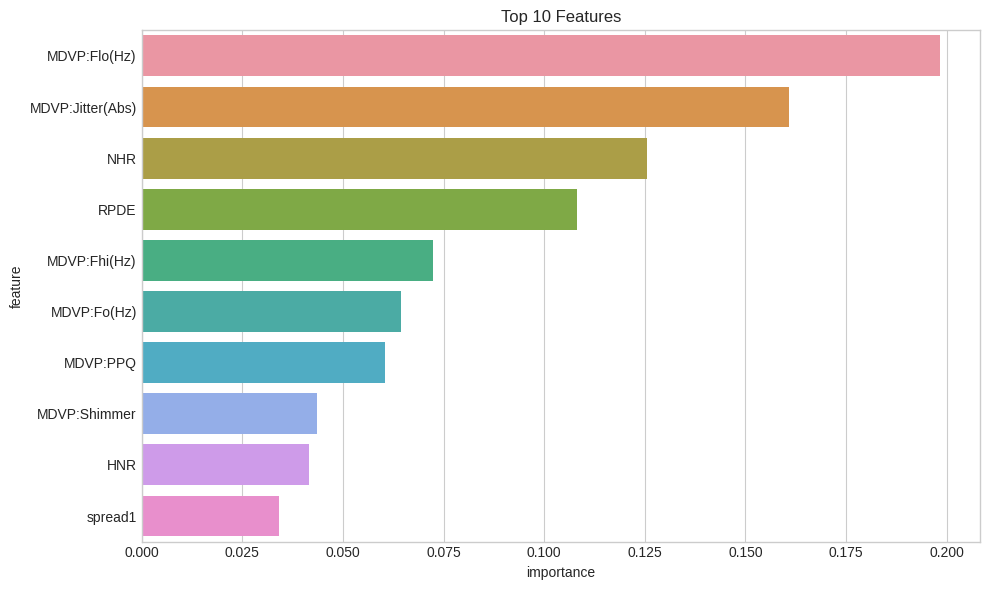

In [40]:
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance.head(10), x='importance', y='feature')
plt.title(f'Top 10 Features')
plt.tight_layout()
plt.show()